# ML Course 4 - Practice (correction)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [41]:
data = pd.read_csv("FuelConsumption.csv")

In [42]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
700,2014,MAZDA,CX-9 4WD,SUV - SMALL,3.7,6,AS6,X,14.3,10.6,12.6,22,290
437,2014,GMC,SAVANA 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380
414,2014,FORD,FUSION AWD,MID-SIZE,2.0,4,AS6,X,10.9,7.5,9.4,30,216
1055,2014,VOLKSWAGEN,TOUAREG TDI CLEAN DIESEL,SUV - STANDARD,3.0,6,AS8,D,12.3,8.0,10.4,27,281
69,2014,BENTLEY,CONTINENTAL GT,SUBCOMPACT,6.0,12,AS8,Z,18.8,11.5,15.5,18,356
1006,2014,TOYOTA,TUNDRA 4WD,PICKUP TRUCK - STANDARD,4.6,8,AS6,X,16.9,12.8,15.1,19,347


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.
* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?
* What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?
* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?
* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?
* Bonus (no penalty if not done): Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

## Proposition of correction

* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.

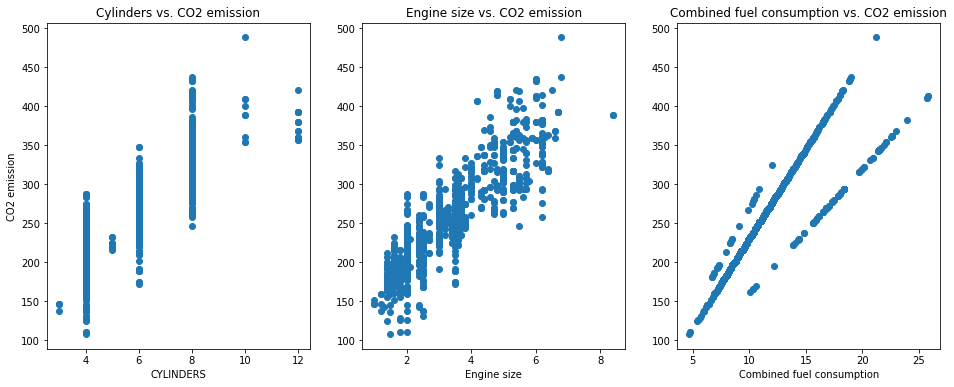

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].scatter(data['CYLINDERS'], data['CO2EMISSIONS'])
axes[0].set_title("Cylinders vs. CO2 emission")
axes[0].set_xlabel("CYLINDERS")
axes[0].set_ylabel("CO2 emission")

axes[1].scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
axes[1].set_title("Engine size vs. CO2 emission")
axes[1].set_xlabel("Engine size")

axes[2].scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'])
axes[2].set_title("Combined fuel consumption vs. CO2 emission")
axes[2].set_xlabel("Combined fuel consumption")

plt.show()

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [44]:
X = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression

reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*CYLINDERS + {:.5}*ENGINESIZE + {:.5}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 64.341 + 7.9121*CYLINDERS + 10.812*ENGINESIZE + 9.6282*FUELCONSUMPTION_COMB


* What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [47]:
y_pred = reg_multiple.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 219936.91
Mean absolute error (MAE): 18.05
Mean square error (MSE): 617.80
Root mean square error (RMSE): 24.86


With FUELCONSUMPTION_COMB has unique predictor, we had computed a residual sum of squares of 309,995. Here, with our three predictors (and test data set of same size), we get a residual sum of squares of 219,937, i.e. a lower value. We have improved our prediction.

In [48]:
from sklearn.metrics import r2_score
print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred))

Variance-score (coefficient of determination): R² = 0.84


In [49]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
regressor = sm.OLS(y, X_sm).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2251.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:35:25   Log-Likelihood:                -4876.1
No. Observations:                1067   AIC:                             9760.
Df Residuals:                    1063   BIC:                             9780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   65.2233 

**Interpretation:**<br>
R-Squared has improved from 0.78 (with single predictor) to 0.84 here with the three predictors. Around 84 % of the variability of CO2 emission is explained by the regression. <br>
The F-statistic has increased as well, meaning that the model fit is even more statistically significant.<br>
The p-values associated to the coefficients of the predictors ($\beta_1$, $\beta_2$, $\beta_3$) are all very close to zero, meaning that these predictors are all statistically significant in this model.

* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

In [50]:
correlation = data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].corr()
correlation

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
FUELCONSUMPTION_CITY,1.000000,0.965718,0.995542
FUELCONSUMPTION_HWY,0.965718,1.000000,0.985804
FUELCONSUMPTION_COMB,0.995542,0.985804,1.000000


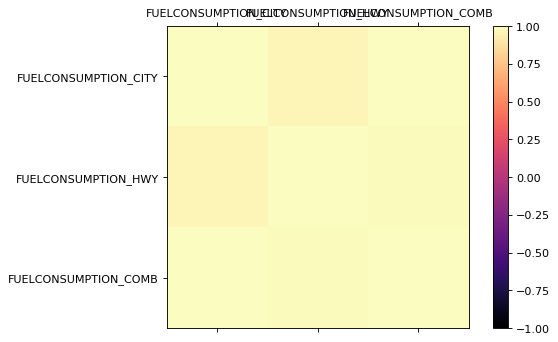

In [51]:
fig = plt.figure(figsize=(8,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.magma, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

These three features are highly correlated between each other. Especially, FUELCONSUMPTION_COMB correlated at more than 98.5 % with FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [52]:
# Data preparation
X_2 = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Train-test split
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size = 1/3, random_state = 0)

# Model fit
reg_multiple_2 = LinearRegression()
reg_multiple_2.fit(X_train_2, y_train)

# Model accuracy
y_pred_2 = reg_multiple_2.predict(X_test_2)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred_2 - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred_2 - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred_2 - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred_2 - y_test) ** 2)))

Residual sum of squares (RSS): 219764.39
Mean absolute error (MAE): 18.02
Mean square error (MSE): 617.32
Root mean square error (RMSE): 24.85


The RSS is approximately the same as before, that means that there is no significant gain of accuracy when adding FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY as predictors. This is due to the fact that these two features are strongly correlated with FUELCONSUMPTION_COMB and do not bring much extra information. Indeed, this latter is a linear combination of the two previous ones. This is called a multicollinearity.

In [62]:
from sklearn.metrics import r2_score
print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred_2))

Variance-score (coefficient of determination): R² = 0.84


In [54]:
X_sm = sm.add_constant(X_2)
regressor = sm.OLS(y, X_sm).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1350.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:35:25   Log-Likelihood:                -4875.4
No. Observations:                1067   AIC:                             9763.
Df Residuals:                    1061   BIC:                             9793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1478 

**Interpretation:**<br>
R-Squared has not changed when compared to the previous model. The F-statistic has even decreased. Adding this two predictors has not provided more information and the prediction accuracy has not improved. <br>
We can also notice that the three predictors associated to fuel consumption all have p-values above 35 %, meaning that **some** of them are not statistically significant in our model. <br>
Extra note: based on this report only, we cannot tell if FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY should **all** be dropped from the model. If we want to check, we have to start by dropping just one (e.g. the one with highest p-value), recompute the report and check how have the p-values of the remaining predictors evolved.

* Bonus (no penalty if not done): Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

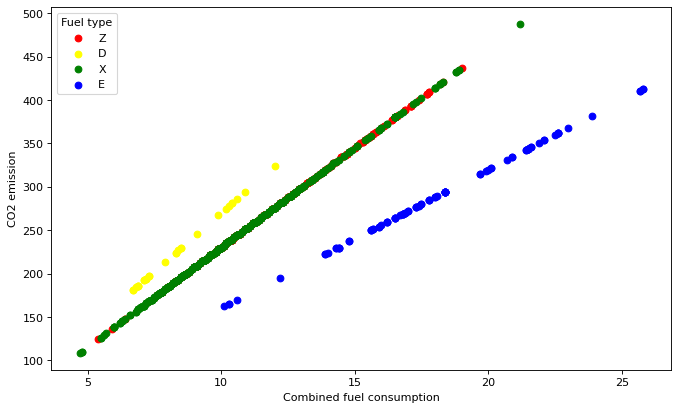

In [55]:
plt.figure(figsize=(10,6))

plt.scatter(data[data['FUELTYPE']=='Z']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='Z'], c='red', label='Z')
plt.scatter(data[data['FUELTYPE']=='D']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='D'], c='yellow', label='D')
plt.scatter(data[data['FUELTYPE']=='X']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='X'], c='green', label='X')
plt.scatter(data[data['FUELTYPE']=='E']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='E'], c='blue', label='E')

plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emission")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

Alternative code:

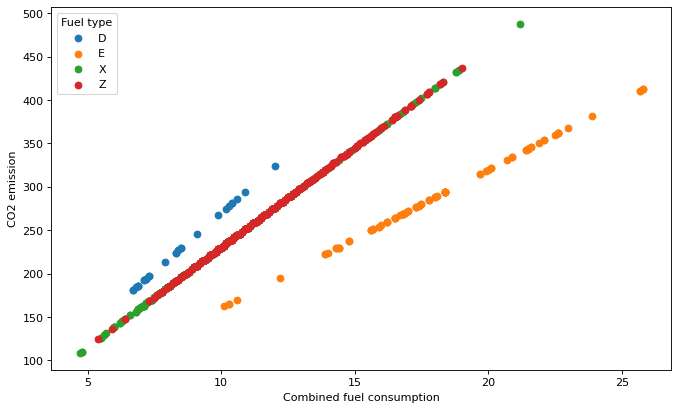

In [56]:
plt.figure(figsize=(10,6))

for group_name, group in data[['CO2EMISSIONS',  'FUELCONSUMPTION_COMB','FUELTYPE']].groupby('FUELTYPE'):
    plt.scatter(group["FUELCONSUMPTION_COMB"], group["CO2EMISSIONS"], label=group_name)

plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emission")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

The graph CO2 emission vs. combined fuel consumption seems to be composed of one line for each fuel type (Z and X are superposed though). It appears that FUELCONSUMPTION_COMB and FUELTYPE are probably sufficient and very good predictors for CO2EMISSION.

In [57]:
# Data preparation
X_3 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Data encoding
X_3 = pd.get_dummies(X_3, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])

# Train-test split
X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size = 1/3, random_state = 0)

# Model fit
reg_multiple_3 = LinearRegression()
reg_multiple_3.fit(X_train_3, y_train)

# Model accuracy
y_pred_3 = reg_multiple_3.predict(X_test_3)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred_3 - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred_3 - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred_3 - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred_3 - y_test) ** 2)))

Residual sum of squares (RSS): 18512.30
Mean absolute error (MAE): 3.40
Mean square error (MSE): 52.00
Root mean square error (RMSE): 7.21


With this model, the RSS (computed on same size of test data set) has decreased from 219,764 to 18,512. It means that we have significatively increased the accuracy of the model.

In [59]:
from sklearn.metrics import r2_score
print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred_3))

Variance-score (coefficient of determination): R² = 0.99


In [20]:
X_sm = sm.add_constant(X_3)
regressor = sm.OLS(y, X_sm).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.335e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:39:05   Log-Likelihood:                -3546.2
No. Observations:                1067   AIC:                             7102.
Df Residuals:                    1062   BIC:                             7127.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -9.7034 

**Interpretation:**<br>
R-Squared has drastically increased and is now around 99 %. Almost all of the CO2 emission variability is explained by the regression. <br>
The high F-statistic shows that we have a strong model fit. <br>
By the way, all the predictors of our model are statistically significant since all p-values are close to zero.